(c) 2016 - present. Enplus Advisors, Inc.

# Programming with Data<br>Foundations of Python and Pandas

# Lesson 3: Split, Apply, Combine

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', '{:,.2f}'.format)

def image(name, **kwargs):
    from IPython.display import Image
    return Image(filename=f'assets/{name}', retina=True, **kwargs)

In [2]:
dat = pd.read_csv('starmine.csv', parse_dates=['date'])
# dat = dat.set_index(['date', 'symbol'], verify_integrity=True).sort_index()

sectors = 'Durbl Enrgy HiTec'.split(' ')
dates = ['1995-01-31', '1995-02-28']
cols = ['date', 'symbol', 'sector', 'smi', 'ret_0_1_m', 'cap_usd']
dat = dat[cols].query('sector in @sectors and date in @dates').reset_index(drop=True)
dat['cap_usd'] = dat['cap_usd'] / 1e6

## Split, Apply, Combine

Hadley Wickham  
**The split-apply-combine strategy for data analysis.**  
_Journal of Statistical Software_, vol. 40, no. 1, pp. 1–29, 2011  

### Visualize Split, Apply, Combine

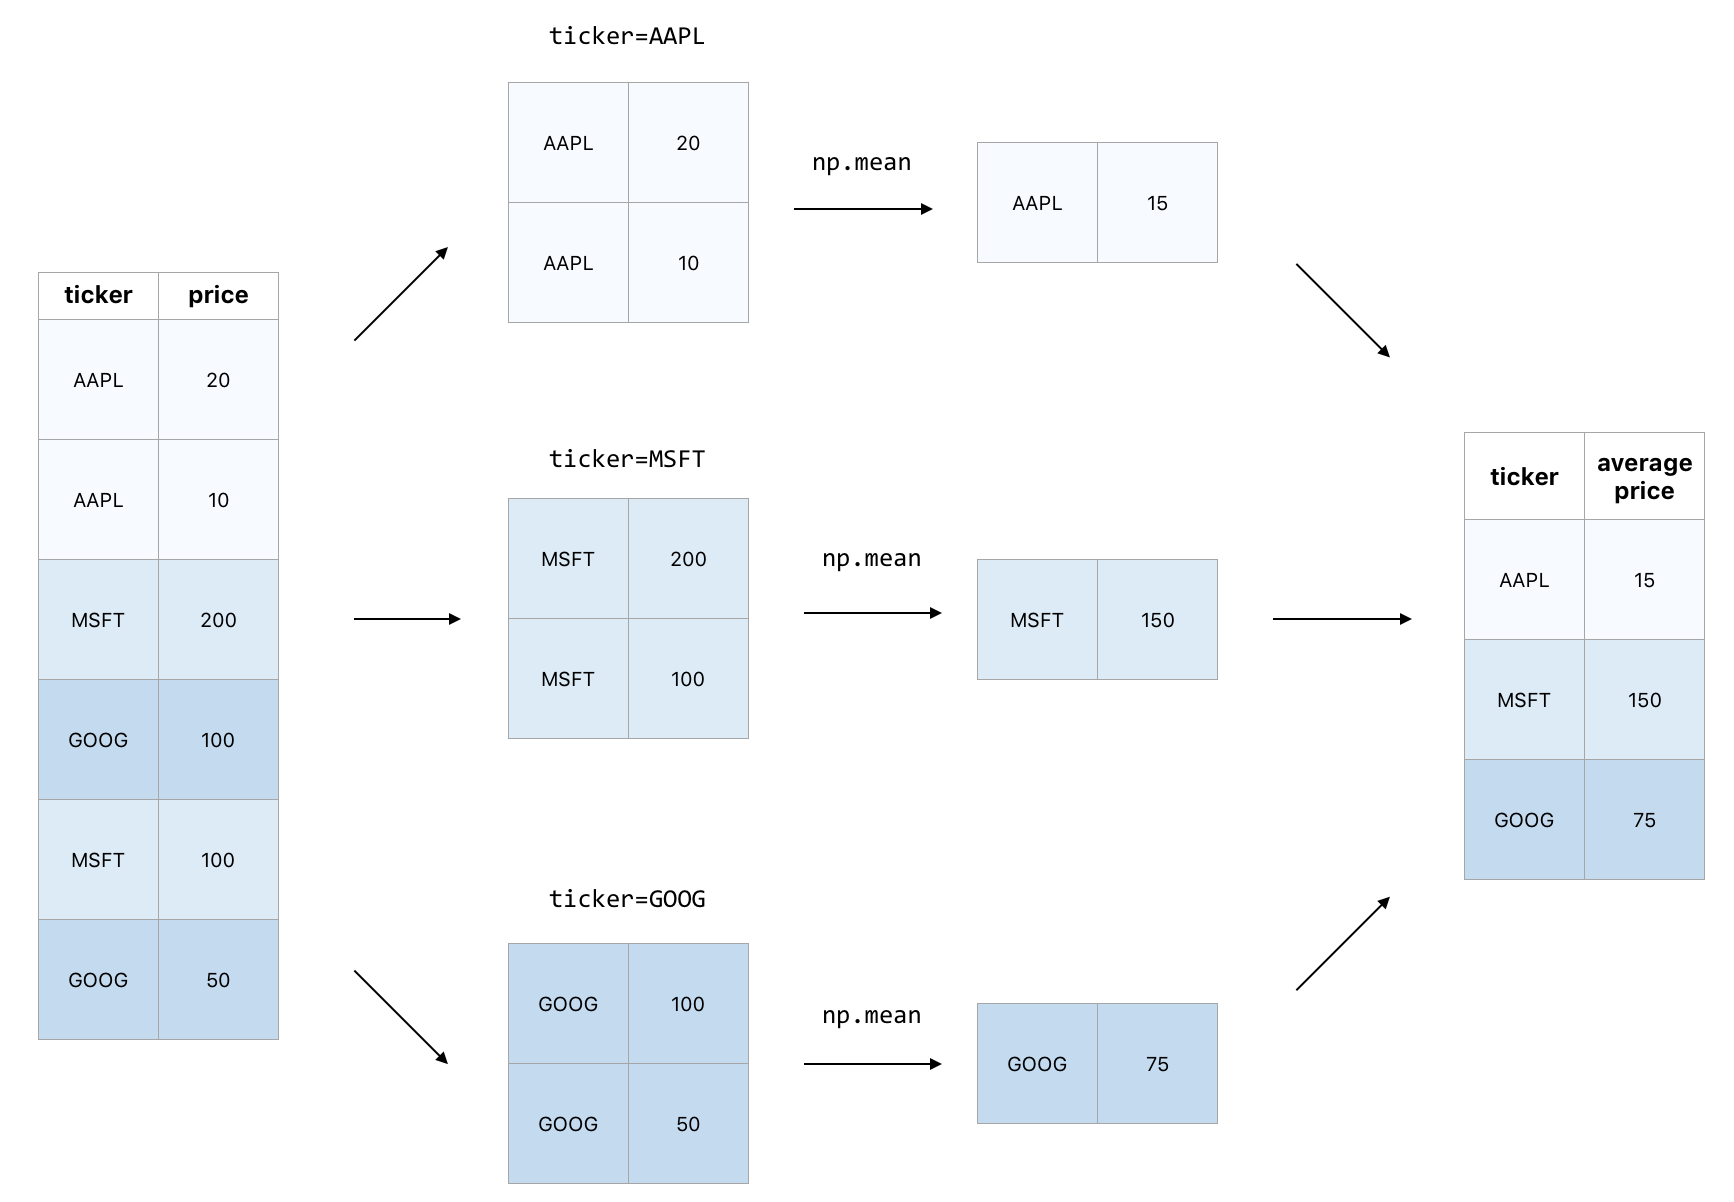

In [3]:
image('split-apply-combine.png')

## Split

Conceptually, allows iteration over the split `DataFrame`

In [4]:
grp = dat.groupby('sector')

In [5]:
for sector_name, sector_df in grp:
    print(f'Sector Name: {sector_name}')
    break # stop the iteration

Sector Name: Durbl


In [6]:
sector_df.head()

,date,symbol,sector,smi,ret_0_1_m,cap_usd
4,1995-01-31,3FDMLQ,Durbl,31.00,0.15,501.47
28,1995-01-31,AICOQ,Durbl,68.00,-0.04,168.10
29,1995-01-31,AIHI,Durbl,45.00,0.11,302.62
48,1995-01-31,APN,Durbl,nan,0.10,124.27
52,1995-01-31,ARV,Durbl,18.00,-0.02,510.95


TODO: Show how to access the group names w/ grp.groups.keys()

TODO: Show how to get a group with grp.get_group('sector')

# Apply

Default applies to all numeric columns.

In [7]:
grp.mean()

,smi,ret_0_1_m,cap_usd
sector,,,
Durbl,47.60,0.01,"2,060.99"
Enrgy,31.30,0.05,"3,868.86"
HiTec,61.95,0.06,"1,480.00"


## Single column apply

Apply to a single column.

In [8]:
# Returns a Series
grp['smi'].mean()

sector
Durbl   47.60
Enrgy   31.30
HiTec   61.95
Name: smi, dtype: float64

In [9]:
# Returns a DataFrame
grp[['smi']].mean()

,smi
sector,
Durbl,47.60
Enrgy,31.30
HiTec,61.95


## One function, multiple columns

Apply the same function to multiple *selected* columns.

In [10]:
grp[['smi', 'cap_usd']].mean()

,smi,cap_usd
sector,,
Durbl,47.60,"2,060.99"
Enrgy,31.30,"3,868.86"
HiTec,61.95,"1,480.00"


## Multiple functions, one or more columns

Apply different functions to a single column and give the
result `DataFrame` custom names.

Use `agg` method (short for `aggregate`)

Apply different functions to a single column. Results have the same
names as the functions.

In [11]:
grp['smi'].agg([np.mean, np.sum, 'std'])

,mean,sum,std
sector,,,
Durbl,47.60,"4,903.00",27.11
Enrgy,31.30,"3,287.00",25.96
HiTec,61.95,"31,161.00",28.49


## Multiple functions, multiple columns

Again, use the `agg` method.

In [12]:
grp.agg(
    mean_smi=('smi', lambda x: x.mean()),
    mean_cap_usd=('cap_usd', np.std)
)

,mean_smi,mean_cap_usd
sector,,
Durbl,47.60,"5,050.71"
Enrgy,31.30,"10,606.64"
HiTec,61.95,"4,484.39"


### Pandas < 0.25

In [13]:
grp.agg({
    'smi': lambda x: x.mean(),
    'cap_usd': np.std
}).rename(columns={
    'smi': 'mean_smi',
    'cap_usd': 'mean_cap_usd'
})

,mean_smi,mean_cap_usd
sector,,
Durbl,47.60,"5,050.71"
Enrgy,31.30,"10,606.64"
HiTec,61.95,"4,484.39"


## Grouping by Multiple Variables

Same idea as before, except our results now have a MultiIndex.

In [14]:
grp2 = dat.groupby(['sector', 'date'])
grp2[['cap_usd', 'smi']].mean()

cap_usd   smi
sector date                     
Durbl  1995-01-31 1,972.09 50.58
       1995-02-28 2,154.07 44.44
Enrgy  1995-01-31 3,793.35 28.49
       1995-02-28 3,944.38 34.17
HiTec  1995-01-31 1,433.75 61.98
       1995-02-28 1,525.97 61.92

## Flexible Apply

Use `apply` to operate on each grouped subset of the `DataFrame`

In [15]:
grp3 = dat.groupby('sector')
grp3.apply(lambda df: df['cap_usd'].corr(df['smi']))

sector
Durbl   -0.05
Enrgy    0.28
HiTec    0.10
dtype: float64

TODO: Add Filter, Transform



SHOW: Combining index and group